In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data2 = np.genfromtxt('ex1data2.txt', delimiter=',')

data2.shape
print(data2)

x2 = data2[:, :2]
y2 = data2[:, -1][np.newaxis].T

y2.shape

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

(47, 1)

In [47]:
def feat_norm(x):
    x_norm = x.copy()
    
    mu = np.mean(x.T, axis=1)
    x_norm = np.subtract(x_norm, mu)
    
    sigma = np.std(x.T, axis=1)
    x_norm = np.divide(x_norm, sigma)
    
    return(x_norm, mu, sigma)

x_norm, mu, sigma = feat_norm(x2)
print('mean' + str(mu))
print('standard deviation' + str(sigma))

x_norm = np.insert(x_norm, 0, 1, axis=1)



mean[2000.68085106    3.17021277]
standard deviation[7.86202619e+02 7.52842809e-01]
[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01

In [11]:
def cost(theta, X, y):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    m = X.shape[0]

    inner = X @ theta - y  # R(m*1)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [12]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    """fit the linear regression, return the parameter and cost
    epoch: how many pass to run through whole batch
    """
    cost_data = [cost(theta, X, y)]
    _theta = theta.copy()  # don't want to mess up with original theta

    for _ in range(epoch):
        _theta = _theta - alpha * X.T @ (X @ theta - y)
        cost_data.append(cost(_theta, X, y))

    return _theta, cost_data


In [15]:
theta_test = np.zeros((3,1))
alpha = 0.1
it = 400
theta, cost_data = batch_gradient_decent(theta_test, x_norm, y2, it, alpha)

In [33]:
x = np.array([[[0], [1], [2]]])
print(x)
y = np.squeeze(x, axis=0)
y.shape
print(y)

[[[0]
  [1]
  [2]]]
[[0]
 [1]
 [2]]


In [51]:
print(theta)


cost_data_ray = np.asarray(cost_data).reshape((401,1))
#cost_data_ray_10 = cost_data_ray.

print(cost_data_ray.shape)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
(401, 1)


Text(0.5, 0, 'Iterations')

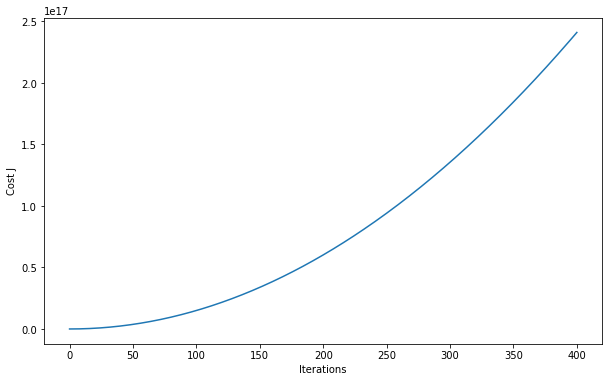

In [40]:
plt.figure(figsize=(10,6))
plt.plot(cost_data_ray_10)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

In [41]:
def cost(theta, X, y):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    m = X.shape[0]

    inner = X @ theta - y  # R(m*1)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [42]:
def gradient(theta, X, y):
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)

    return inner / m

In [43]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    """fit the linear regression, return the parameter and cost
    epoch: how many pass to run through whole batch
    """
    cost_data = [cost(theta, X, y)]
    _theta = theta.copy()  # don't want to mess up with original theta

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(cost(_theta, X, y))

    return _theta, cost_data

In [50]:
theta_test = np.zeros((3,1))
alpha = 0.1
it = 400
theta, cost_data = batch_gradient_decent(theta_test, x_norm, y2, it)

print(theta)
#print(cost_data)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
